# Análise de Churn de uma Empresa de Telefonia

## 1 - Importando as Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')  ##definindo estilo ggplot
plt.rcParams["figure.figsize"] = (8, 6) #fixando o figsize

## 2 - Análise Exploratória

In [2]:
churn = pd.read_csv("C:\\Users\mateu\OneDrive\Área de Trabalho\churn.csv")
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
churn.isna().sum() #Verificando se há valores nulos

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
churn.shape

(7043, 21)

In [5]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
churn = churn.replace({'Yes': 1, 'No': 0}) #Trocando quem tem Yes e No, por binários, para facilitar a análise

In [7]:
churn['PhoneService'] = churn['PhoneService'].astype(int) #Alterando o valor de Object para Int
churn['OnlineSecurity'] = churn['OnlineSecurity'].astype(int)
churn['OnlineBackup'] = churn['OnlineBackup'].astype(int)
churn['DeviceProtection'] = churn['DeviceProtection'].astype(int)
churn['TechSupport'] = churn['TechSupport'].astype(int)
churn['StreamingTV'] = churn['StreamingTV'].astype(int)
churn['StreamingMovies'] = churn['StreamingMovies'].astype(int)


ValueError: invalid literal for int() with base 10: 'No internet service'

Deu um erro dizendo que tem colunas que tem o valor "No internet service". Essa valor não poderá ser convertido para número.

In [8]:
churn['OnlineSecurity'].value_counts()

OnlineSecurity
0                      3498
1                      2019
No internet service    1526
Name: count, dtype: int64

In [9]:
churn['OnlineSecurity'] = churn['OnlineSecurity'].replace({'No internet service': '0'})

Quem não tem serviço de internet pode ser colocado como sem Online Security

In [10]:
churn['OnlineBackup'].value_counts()

OnlineBackup
0                      3088
1                      2429
No internet service    1526
Name: count, dtype: int64

In [13]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Substituindo o valor "No internet service" por 0, pois eles entram na categoria que não terão este serviço.

In [14]:
churn[['PhoneService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']] = churn[['PhoneService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].replace({'No internet service': '0'})

Agora podemos definir as variáveis como tipo int

In [15]:
churn['PhoneService'] = churn['PhoneService'].astype(int)
churn['OnlineSecurity'] = churn['OnlineSecurity'].astype(int)
churn['OnlineBackup'] = churn['OnlineBackup'].astype(int)
churn['DeviceProtection'] = churn['DeviceProtection'].astype(int)
churn['TechSupport'] = churn['TechSupport'].astype(int)
churn['StreamingTV'] = churn['StreamingTV'].astype(int)
churn['StreamingMovies'] = churn['StreamingMovies'].astype(int)

In [16]:
churn1 = churn[churn['Churn']==1] #Separando o dataset por quem deu churn
churn0 = churn[churn['Churn']==0]

In [43]:
stat0 = churn0.describe()
stat0 = stat0.iloc[1]
stat1 = churn1.describe()
stat1 = stat1.iloc[1]

stat =pd.concat([stat0, stat1], axis = 1) #concatenando os dois describes e renomeando as colunas
stat.columns = ['No Churn', 'Yes Churn']
stat

,No Churn,Yes Churn
SeniorCitizen,0.128721,0.254682
Partner,0.528218,0.357945
Dependents,0.344801,0.174425
tenure,37.569965,17.979133
PhoneService,0.901044,0.909042
OnlineSecurity,0.333204,0.157838
OnlineBackup,0.368380,0.279829
DeviceProtection,0.362775,0.291600
TechSupport,0.335137,0.165864
StreamingTV,0.365868,0.435527


#### Vamos plotar um gráfico para melhor análise

In [44]:
stat.drop(index = ['MonthlyCharges', 'tenure', 'Churn'], inplace = True) #eliminando os valores sem porcentagem

In [58]:
stat = stat*100

Text(0, 0.5, 'Serviços')

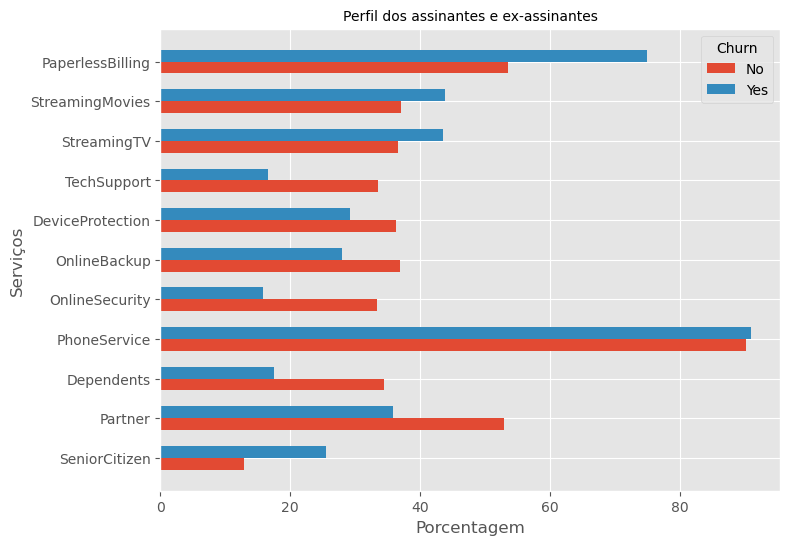

In [253]:
fig, ax = plt.subplots()
x = np.arange(11)
l = 0.3

ax.barh(x - l/2, stat['No Churn'], height = l, label = 'No')
ax.barh(x + l/2, stat['Yes Churn'], height = l, label = 'Yes')
ax.set_yticks(x, (stat.index))
plt.legend(title = 'Churn')
plt.title('Perfil dos assinantes e ex-assinantes', fontsize = 10)
plt.xlabel('Porcentagem')
plt.ylabel('Serviços')

Agora nós temos o perfil de quem deu churn e quem não deu

- Quem deu churn tem uma média mensal maior de gastos (conforme a tabela)
- Quem deu churn tem maior probabilidade de ter fatura digital , será que ter fatura digital influencia em dar churn por ser mais fácil de cancelar?
- Veja, é somente maior a probabilidade de ter o seviço de streaming em quem deu churn. Os outros serviços é menor a probabilidade de quem deu churn ter. Podemos ter duas conclusões: a primeira é, se quem deu churn tivesses os demais serviços como por exemplo o Tech Support, não iria cancelar a assinatura. E a segunda é, como proporcionalmente quem deu churn tem maior chance de ter Streaming por assinatura, pode ser que haja uma correlação entre ter Streaming TV e Churn
- Os dois perfis tem a mesma probabilidade de ter PhoneService
- Quem não deu churn é mais provavel que seja Senior, não tenha dependentes e não tenha parceiro

### 2.1 - Quantidade por Gênero

Text(0.5, 1.0, 'Quantidade de Gênero')

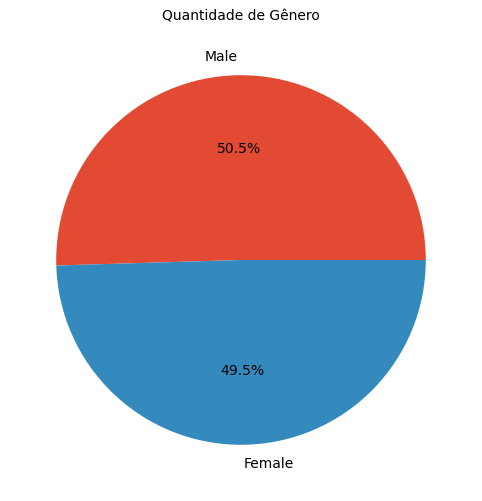

In [63]:
gender = churn['gender'].value_counts()
plt.pie(gender, autopct = '%1.1f%%', labels = gender.index)
plt.title('Quantidade de Gênero', fontsize =10)

### 2.2 - Mensal Charges

Text(0.5, 1.0, 'Monthly Charge')

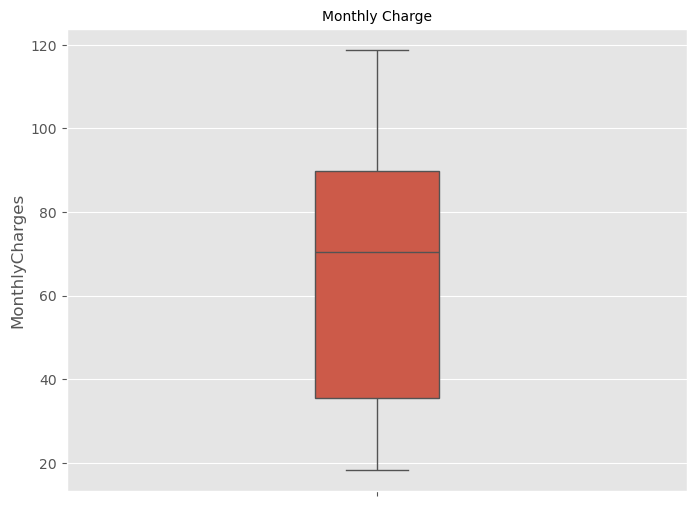

In [64]:
charges_mensal = churn['MonthlyCharges']
sns.boxplot(charges_mensal, width = 0.2)
plt.title('Monthly Charge', fontsize = 10)

In [65]:
charges_mensal.describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Text(0, 0.5, 'Valores Médios')

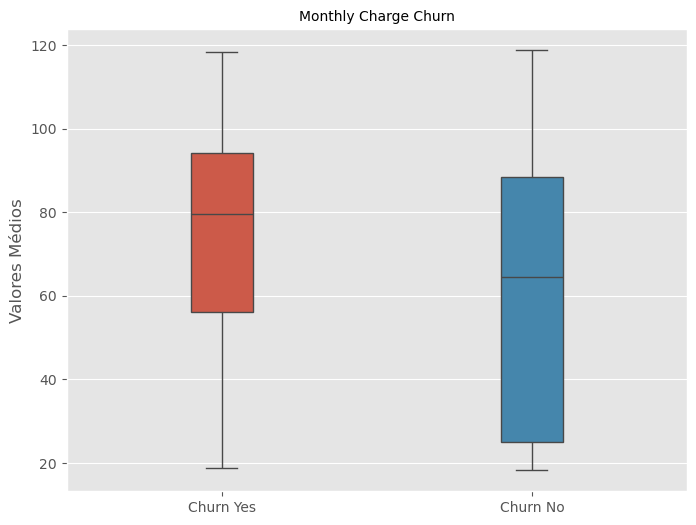

In [79]:
charges_mensal1 = churn1['MonthlyCharges'].rename('Churn Yes')
charges_mensal0 = churn0['MonthlyCharges'].rename('Churn No')
sns.boxplot([charges_mensal1, charges_mensal0], width = 0.2)
plt.title('Monthly Charge Churn', fontsize = 10)
plt.ylabel('Valores Médios')

Quem não deu churn tem uma assinatura mensal mais barata, ou seja, é maior a probabilidade de quem deu churn ter assinatura acima da média. Mas isso pode ser decorrente dos serviços.

### 2.3 - Total Charges

<Axes: ylabel='TotalCharges'>

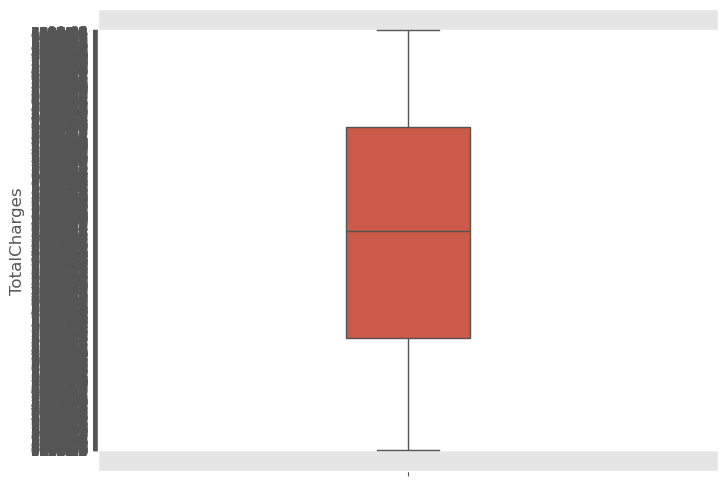

In [67]:
charges_total = churn['TotalCharges']
sns.boxplot(y = charges_total, width = 0.2) ## com erro

Os dados apresentam erros, precisamos converter para float esse total charges, dessa forma não aparece legenda em todos os valores

Text(0.5, 1.0, 'Boxplot Total Charges')

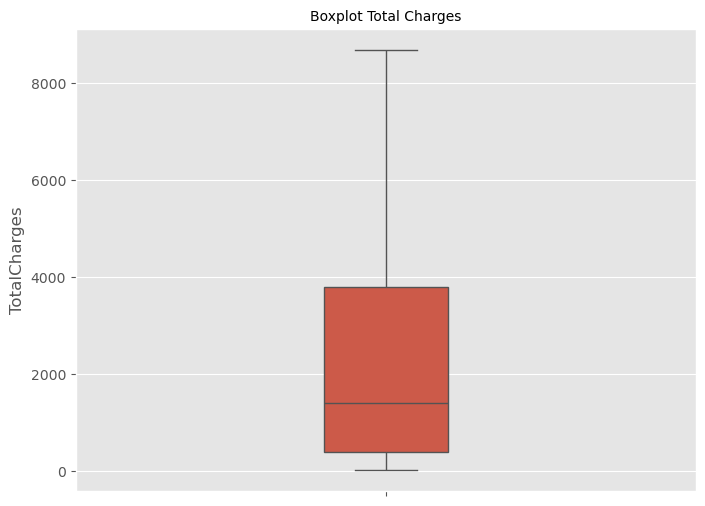

In [69]:
churn['TotalCharges'] = churn['TotalCharges'].replace(" ", None).astype(float) #Eliminando os espaços em brancos que estão gerando erros
charges_total = churn['TotalCharges']
sns.boxplot(charges_total, width = 0.2) # Agora é possível plotar o gráfico corretamente
plt.title('Boxplot Total Charges', fontsize = 10)

<Axes: >

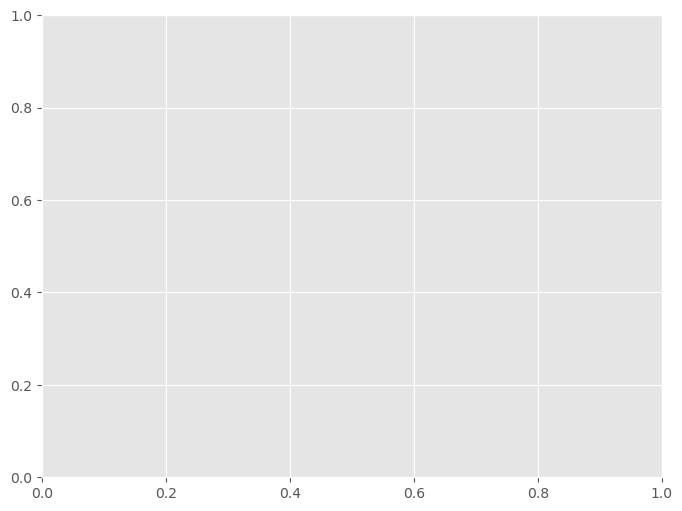

In [78]:
charges_total1 = churn1['TotalCharges'].rename('Churn Yes')
charges_total0 = churn0['TotalCharges'].rename('Churn No')
sns.boxplot([charges_total1, charges_total0], width = 0.2) #gráfico com erro

In [83]:
churn1.info() #Ainda esta como objeto ao inves de float

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1869 non-null   object 
 1   gender            1869 non-null   object 
 2   SeniorCitizen     1869 non-null   int64  
 3   Partner           1869 non-null   int64  
 4   Dependents        1869 non-null   int64  
 5   tenure            1869 non-null   int64  
 6   PhoneService      1869 non-null   int32  
 7   MultipleLines     1869 non-null   object 
 8   InternetService   1869 non-null   object 
 9   OnlineSecurity    1869 non-null   int32  
 10  OnlineBackup      1869 non-null   int32  
 11  DeviceProtection  1869 non-null   int32  
 12  TechSupport       1869 non-null   int32  
 13  StreamingTV       1869 non-null   int32  
 14  StreamingMovies   1869 non-null   int32  
 15  Contract          1869 non-null   object 
 16  PaperlessBilling  1869 non-null   int64  
 17  

In [89]:
churn1['TotalCharges'] = churn1['TotalCharges'].replace(" ", None).astype(float) #convertendo para float, e dando replace de vazio por none
churn0['TotalCharges'] = churn0['TotalCharges'].replace(" ", None).astype(float)

C:\Users\mateu\AppData\Local\Temp\ipykernel_20912\2550949069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn1['TotalCharges'] = churn1['TotalCharges'].replace(" ", None).astype(float)
C:\Users\mateu\AppData\Local\Temp\ipykernel_20912\2550949069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn0['TotalCharges'] = churn0['TotalCharges'].replace(" ", None).astype(float)


In [90]:
churn1.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1869 non-null   object 
 1   gender            1869 non-null   object 
 2   SeniorCitizen     1869 non-null   int64  
 3   Partner           1869 non-null   int64  
 4   Dependents        1869 non-null   int64  
 5   tenure            1869 non-null   int64  
 6   PhoneService      1869 non-null   int32  
 7   MultipleLines     1869 non-null   object 
 8   InternetService   1869 non-null   object 
 9   OnlineSecurity    1869 non-null   int32  
 10  OnlineBackup      1869 non-null   int32  
 11  DeviceProtection  1869 non-null   int32  
 12  TechSupport       1869 non-null   int32  
 13  StreamingTV       1869 non-null   int32  
 14  StreamingMovies   1869 non-null   int32  
 15  Contract          1869 non-null   object 
 16  PaperlessBilling  1869 non-null   int64  
 17  

In [91]:
churn0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5174 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5174 non-null   object 
 1   gender            5174 non-null   object 
 2   SeniorCitizen     5174 non-null   int64  
 3   Partner           5174 non-null   int64  
 4   Dependents        5174 non-null   int64  
 5   tenure            5174 non-null   int64  
 6   PhoneService      5174 non-null   int32  
 7   MultipleLines     5174 non-null   object 
 8   InternetService   5174 non-null   object 
 9   OnlineSecurity    5174 non-null   int32  
 10  OnlineBackup      5174 non-null   int32  
 11  DeviceProtection  5174 non-null   int32  
 12  TechSupport       5174 non-null   int32  
 13  StreamingTV       5174 non-null   int32  
 14  StreamingMovies   5174 non-null   int32  
 15  Contract          5174 non-null   object 
 16  PaperlessBilling  5174 non-null   int64  
 17  

<Axes: >

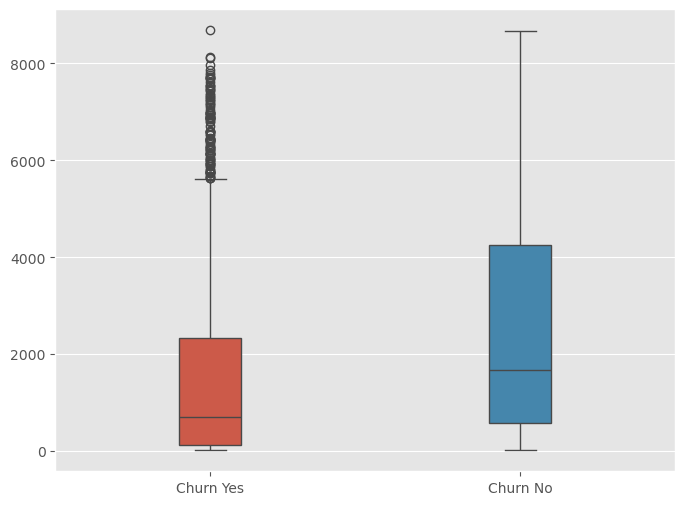

In [92]:
charges_total1 = churn1['TotalCharges'].rename('Churn Yes')
charges_total0 = churn0['TotalCharges'].rename('Churn No')
sns.boxplot([charges_total1, charges_total0], width = 0.2) #boxplot correto com dados float

Quem deu churn teve um acumulado de gastos bem menor, provavelmente por ter uma Tenure menor também

### 2.4 - Tenure

<Axes: ylabel='tenure'>

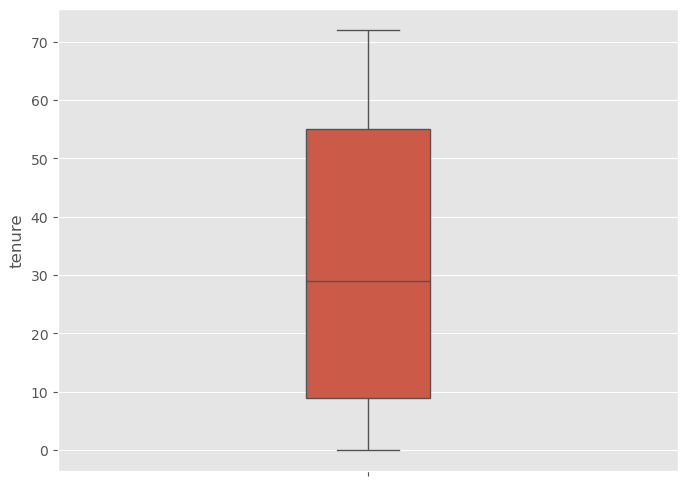

In [93]:
sns.boxplot(churn['tenure'], width = 0.2)

In [94]:
churn.isna().sum() #Verificando os se tem dados missing

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [95]:
churn[churn['tenure']== 0] #verificando se tem assinatens com tenure = 0

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,1,1,0,0,No phone service,DSL,1,...,1,1,1,0,Two year,1,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,0,1,0,1,0,0,0,...,0,0,0,0,Two year,0,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,1,1,0,1,0,DSL,1,...,1,0,1,1,Two year,0,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,1,1,0,1,1,0,0,...,0,0,0,0,Two year,0,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,1,1,0,0,No phone service,DSL,1,...,1,1,1,0,Two year,0,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,1,1,0,1,0,0,0,...,0,0,0,0,Two year,0,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,1,1,0,1,1,0,0,...,0,0,0,0,Two year,0,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,1,1,0,1,0,0,0,...,0,0,0,0,Two year,0,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,1,1,0,1,0,0,0,...,0,0,0,0,One year,1,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,1,1,0,1,1,DSL,0,...,1,1,1,0,Two year,0,Mailed check,73.35,NaN,0


Veja que todos os 11 dados missing de Total Charges estão nas linhas onde Tenure = 0. Provavelmente são clientes que acabaram de adquirir a assinatura.

Text(0, 0.5, 'Meses')

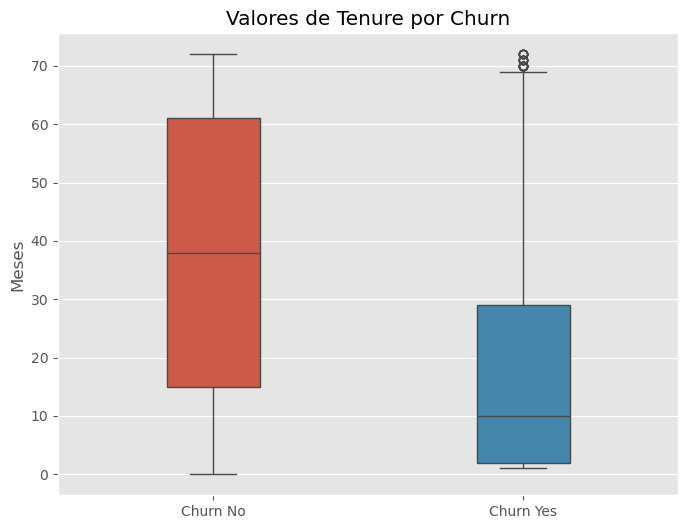

In [104]:
sns.boxplot([churn0['tenure'].rename('Churn No'), churn1['tenure'].rename('Churn Yes')], width = 0.3)
plt.title('Valores de Tenure por Churn')
plt.ylabel('Meses')

Quem deu churn teve uma tenure menor. Agora precisamos saber qual o período em que estão dando churn, iremos saber disso mais pra frente.

## 3 - Começando nossa análise

### 3.1 Porcentagem de Gênero que deu churn

In [105]:
gen_churn = churn.groupby('gender')['Churn'].value_counts(normalize = True)
gen_churn

gender  Churn
Female  0        0.730791
        1        0.269209
Male    0        0.738397
        1        0.261603
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Male que deu churn')

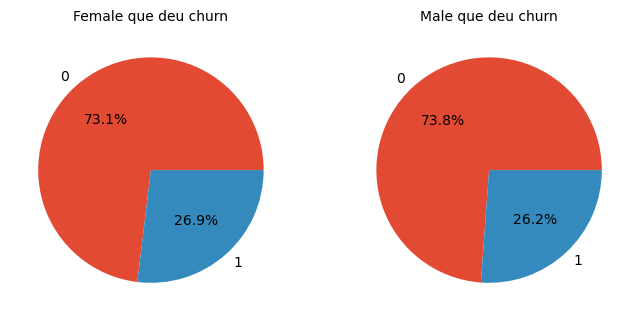

In [106]:
fig, ax = plt.subplots(1,2)

ax[0].pie(gen_churn[0:2], autopct = "%1.1f%%", labels = ['0', '1'])
ax[0].set_title('Female que deu churn', fontsize = 10)
ax[1].pie(gen_churn[2:4], autopct = "%1.1f%%", labels = ['0', '1'])
ax[1].set_title('Male que deu churn', fontsize = 10)

Ambos os gêneros tiveram a mesma proporção que deu churn. Parece que não esta relacionado Churn com Gênero

### 3.1 Porcentagem de Partner que deu churn

In [107]:
partner_churn = churn.groupby('Partner')['Churn'].value_counts(normalize = True)
partner_churn

Partner  Churn
0        0        0.670420
         1        0.329580
1        0        0.803351
         1        0.196649
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Partner Yes churn')

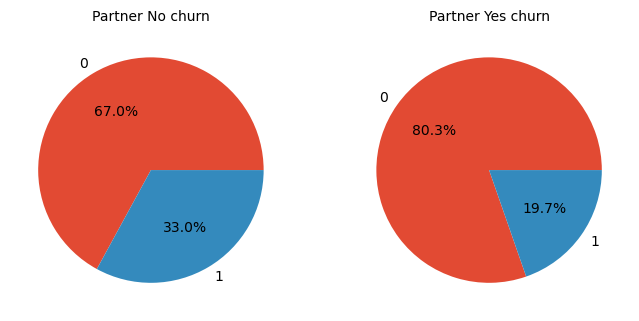

In [108]:
fig, ax = plt.subplots(1,2)

ax[0].pie(partner_churn[0:2], autopct = "%1.1f%%", labels = ['0', '1'])
ax[0].set_title('Partner No churn', fontsize = 10)
ax[1].pie(partner_churn[2:4], autopct = "%1.1f%%", labels = ['0', '1'])
ax[1].set_title('Partner Yes churn', fontsize = 10)

A proporção de churn em quem ter partner é menor. Pode ser que quem tenha parceiro, deva ser incentivado a assistir algum filme junto, por isso tem menor probabilidade de ter churn.

### 3.2 O churn acontece em qual período?

Text(0.5, 1.0, 'YES Churn Tenure Histogram')

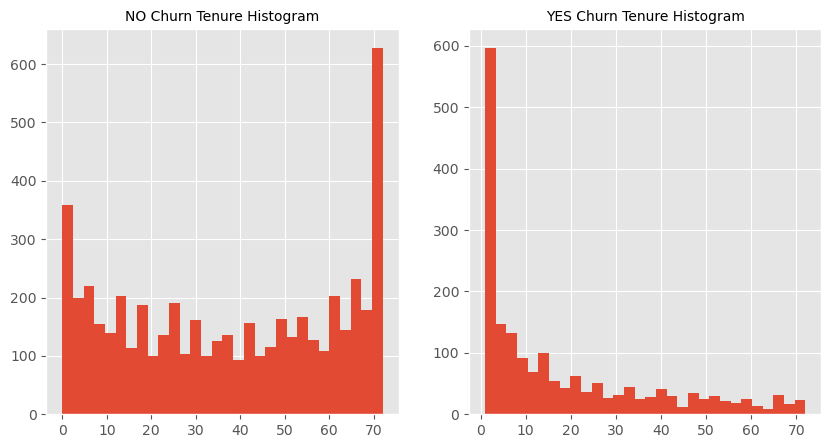

In [111]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].hist(churn0['tenure'], bins = 30)
ax[0].set_title('NO Churn Tenure Histogram', fontsize = 10)
ax[1].hist(churn1['tenure'], bins = 30)
ax[1].set_title('YES Churn Tenure Histogram', fontsize = 10)

A maioria das pessoas deu Churn nos primeiros meses.

In [113]:
churn1['tenure'].value_counts()

tenure
1     380
2     123
3      94
4      83
5      64
     ... 
60      6
72      6
62      5
64      4
63      4
Name: count, Length: 72, dtype: int64

Mais especificamente logo após o primeiro pagamento as pessoas dão churn. Seria interessante fazer algum promoção para não perder esses clientes de 1-2 meses de assinatura, ou fazer alguma pesquisa verificando o motivo de estar deixando de assinar.

### 3.3 Churn na população senior e não senior

In [114]:
senior = churn.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True)
senior

SeniorCitizen  Churn
0              0        0.763938
               1        0.236062
1              0        0.583187
               1        0.416813
Name: proportion, dtype: float64

In [115]:
senior0 = senior[0:2]
senior1 = senior[2:4]

Text(0.5, 1.0, 'YES Senior Churn')

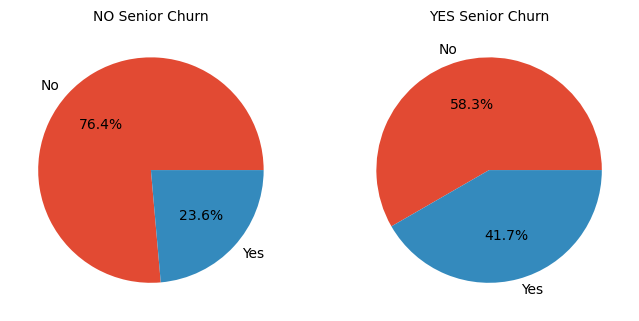

In [116]:
fig, ax = plt.subplots(1,2)
ax[0].pie(senior0, labels = ['No', 'Yes'], autopct = "%1.1f%%")
ax[0].set_title('NO Senior Churn', fontsize = 10)
ax[1].pie(senior1, labels = ['No', 'Yes'], autopct = "%1.1f%%")
ax[1].set_title('YES Senior Churn', fontsize = 10)

Quem é senior tem maior probabilidade de ter churn.

### 3.4 Churn na população que tem dependentes

In [117]:
dependents = churn.groupby('Dependents')['Churn'].value_counts(normalize = True)
dependents

Dependents  Churn
0           0        0.687209
            1        0.312791
1           0        0.845498
            1        0.154502
Name: proportion, dtype: float64

Text(0.5, 1.0, 'YES Dependent Churn')

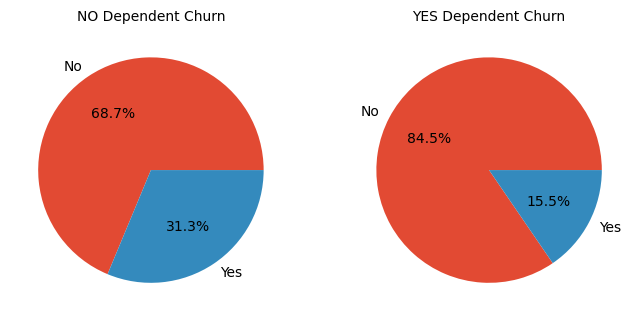

In [118]:
dependents0 = dependents[0:2]
dependents1 = dependents[2:4]

fig, ax = plt.subplots(1,2)
ax[0].pie(dependents0, labels = ['No', 'Yes'], autopct = "%1.1f%%")
ax[0].set_title('NO Dependent Churn', fontsize = 10)
ax[1].pie(dependents1, labels = ['No', 'Yes'], autopct = "%1.1f%%")
ax[1].set_title('YES Dependent Churn', fontsize = 10)

Quem tem dependentes tem menos probabilidade de dar churn. Talvez seja porque quem tenha dependentes queira dar mais conforto aos seus familiares. E quanto mais pessoas na casa, mais dependente dos serviços a familia fica

### 3.5 Churn na população que teve suporte técnico

Text(0.5, 1.0, 'Churn Suport YES')

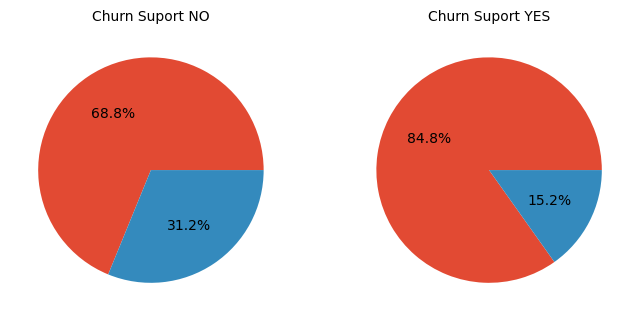

In [120]:
suport = churn.groupby('TechSupport')['Churn'].value_counts()
suport0 = suport[0:2]
suport1 = suport[2:4]

fig , ax = plt.subplots(1,2)
ax[0].pie(suport0, autopct = "%1.1f%%")
ax[0].set_title('Churn Suport NO', fontsize = 10)
ax[1].pie(suport1, autopct = "%1.1f%%")
ax[1].set_title('Churn Suport YES', fontsize = 10)

Como já era o esperado. clientes que tiveram o suporte tem maior probabilidade de não darem churn. O suporte talvez possa ser um impeditivo para que os clientes não deem churn, resolvendo os problemas de forma eficaz.

### 3.6 Churn por plano de assinatura

In [122]:
churn['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [139]:
contract = churn.groupby('Churn')['Contract'].value_counts(normalize = True).reset_index().sort_values(by= 'Contract')
contract

,Churn,Contract,proportion
0,0,Month-to-month,0.429068
3,1,Month-to-month,0.885500
2,0,One year,0.252609
4,1,One year,0.088818
1,0,Two year,0.318322
5,1,Two year,0.025682


[Text(0, 0, 'NO CHURN'), Text(1, 0, 'YES CHURN')]

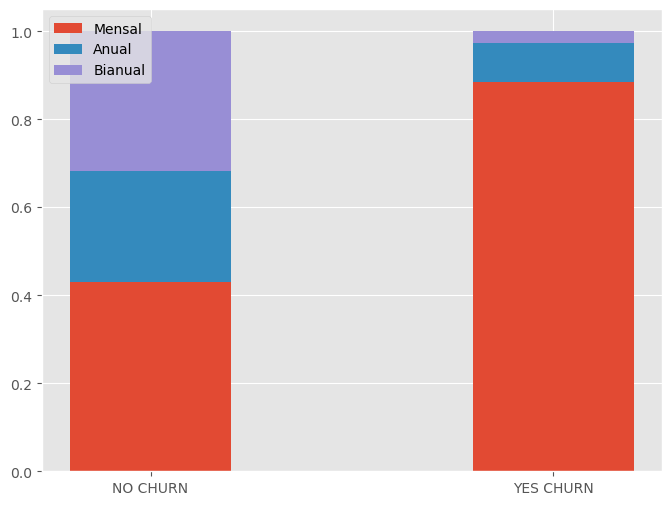

In [169]:
fig, ax = plt.subplots()

plt.bar(contract['Churn'][0:2], contract['proportion'][0:2], width = 0.4, label = 'Mensal')
plt.bar(contract['Churn'][2:4], contract['proportion'][2:4], bottom = contract['proportion'][0:2], width = 0.4, label = 'Anual')
plt.bar(contract['Churn'][4:6], contract['proportion'][4:6], bottom = np.array(contract['proportion'][2:4]) + np.array(contract['proportion'][0:2]), width = 0.4, label = 'Bianual')
plt.legend(loc="upper left")
ax.set_xticks([0,1])
ax.set_xticklabels(['NO CHURN', 'YES CHURN'])

Em quem deu churn, a assinatura é majoritariamente mensal. Esse fato é um candidato forte para ser uma das causas de quem deu churn. Seria interessante incentivar os clientes a aderirem o quanto antes à planos de maior durabilidade.

### 3.7 Churn por tipo de internet

In [204]:
internet = churn.groupby('InternetService')['Churn'].value_counts(normalize= True)
internet


InternetService  Churn
0                0        0.925950
                 1        0.074050
DSL              0        0.810409
                 1        0.189591
Fiber optic      0        0.581072
                 1        0.418928
Name: proportion, dtype: float64

Text(0.5, 1.0, 'FIBER')

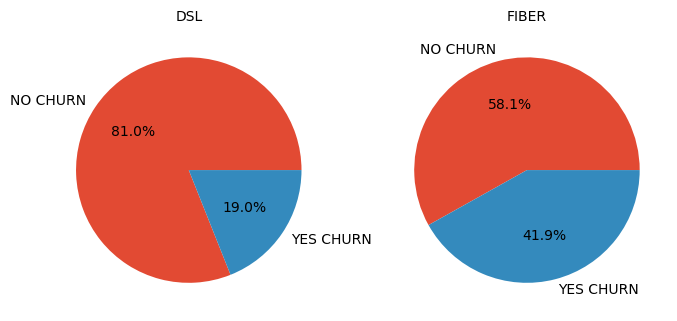

In [209]:
fig, ax = plt.subplots(1,2)

ax[0].pie(internet[2:4], labels = ['NO CHURN', 'YES CHURN'], autopct = '%1.1f%%')
ax[0].set_title('DSL', fontsize= 10)
ax[1].pie(internet[4:6], labels = ['NO CHURN', 'YES CHURN'], autopct = '%1.1f%%')
ax[1].set_title('FIBER', fontsize= 10)

Quem tem DSL tem menor probabilidade de dar Churn, e isso é curioso pois DSL é uma internet mais instável e lenta. Talvez possa ser pelo fato de que a internet de fibra apresente muita instabilidade, seria interessante investigar isso.

### 3.8 Churn por Paperless

In [214]:
paper = churn.groupby('PaperlessBilling')['Churn'].value_counts(normalize= True)
paper

PaperlessBilling  Churn
0                 0        0.836699
                  1        0.163301
1                 0        0.664349
                  1        0.335651
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Paperless')

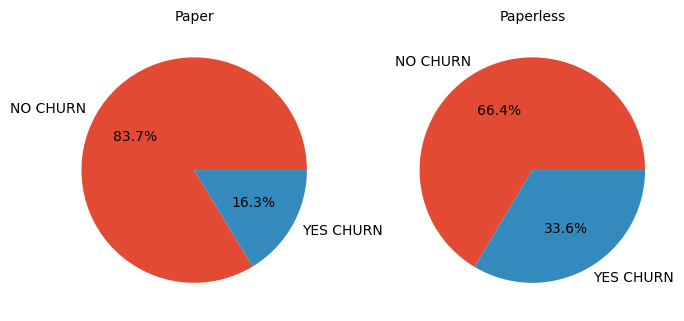

In [216]:
fig, ax = plt.subplots(1,2)

ax[0].pie(paper[0:2], labels = ['NO CHURN', 'YES CHURN'], autopct = '%1.1f%%')
ax[0].set_title('Paper', fontsize= 10)
ax[1].pie(paper[2:4], labels = ['NO CHURN', 'YES CHURN'], autopct = '%1.1f%%')
ax[1].set_title('Paperless', fontsize= 10)

Quem usa papel tem menor chance de dar Churn, talvez pelo fato de que quem use o papel para pagar não seja cliente que interaja com aplicativo, e consequentemente, tem maior impedimento para fazer algum cancelamento comparado aos clientes que usam mais o aplicativo e conseguirão fazer o cancelamento por lá mesmo.

### 3.9 Churn por tipo de pagamento

In [ ]:
payment = churn.groupby('PaymentMethod')['Churn'].value_counts(normalize = True)
payment

Text(0.5, 1.0, 'Mailed Check')

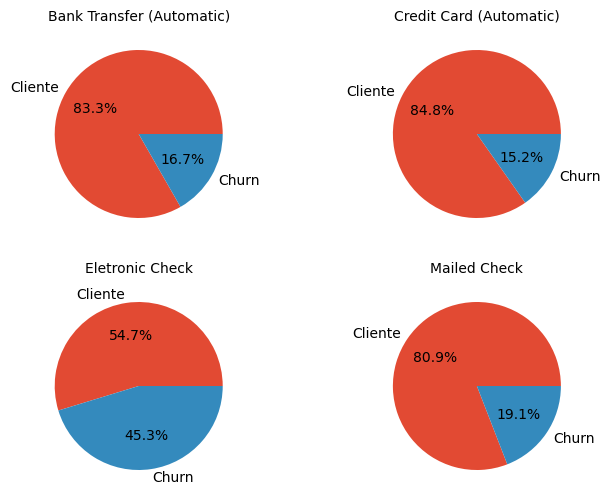

In [237]:
fig, ax = plt.subplots(2,2)
ax[0][0].pie(payment[0:2], autopct = "%1.1f%%", labels = ['Cliente', 'Churn'])
ax[0][0].set_title('Bank Transfer (Automatic)', fontsize = 10)
ax[0][1].pie(payment[2:4], autopct = "%1.1f%%", labels = ['Cliente', 'Churn'])
ax[0][1].set_title('Credit Card (Automatic)', fontsize = 10)
ax[1][0].pie(payment[4:6], autopct = "%1.1f%%", labels = ['Cliente', 'Churn'])
ax[1][0].set_title('Eletronic Check', fontsize = 10)
ax[1][1].pie(payment[6:8], autopct = "%1.1f%%", labels = ['Cliente', 'Churn'])
ax[1][1].set_title('Mailed Check', fontsize = 10)

Clientes que fazem o pagamento por Eletronic Checkk tem  a maior probabilidade de ter dado churn. Um eCheck pode levar de 2 a 5 dias úteis para ser processado, enquanto pagamentos com cartão são quase instantâneos. Esse atraso pode causar frustração nos clientes, levando ao cancelamento.

### 3.10 - Dispersão entre Tenure e Charges


Text(0.5, 1.0, 'Dispesão entre Tenure e Monthly Charges')

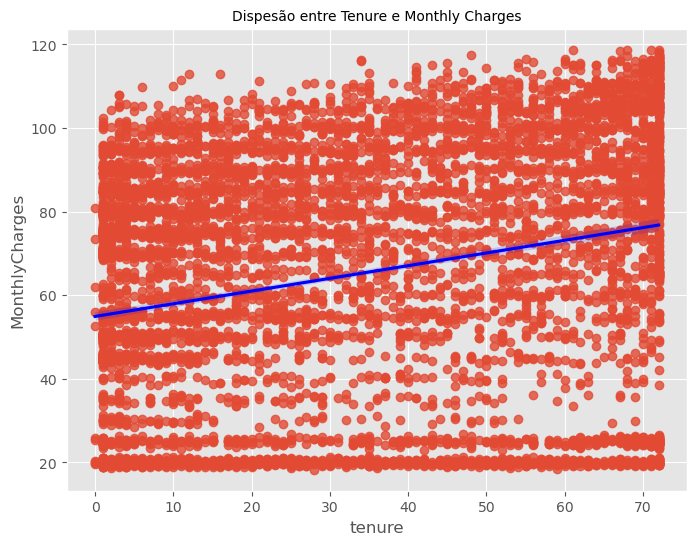

In [250]:
sns.regplot(data = churn, x = churn['tenure'], y =churn['MonthlyCharges'], line_kws={"color": "blue"})
plt.title('Dispesão entre Tenure e Monthly Charges', fontsize = 10)

Temos que quanto maior a Tenure, maior o Monthly Cahrges. Talvez isso se deva ao fato de que quando um cliente é mais fiel, ele vai adquirindo mais pacotes adicionais.